### Clustering Projectement
Theof this project  goal study infectious diseases based on the county, year, and sex and be able to use the understanding to make prediction for future cases. d
The following steps were performed:
of [score].


1. Data Collection
2. Data Analysis and Visualization
3. Machine Learning

Data from data.world website: https://data.world/chhs/03e61434-7db8-4a53-a3e2-1d4d36d6848d 

### 1. Data Collection

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/ASUS/Downloads/chhs-03e61434-7db8-4a53-a3e2-1d4d36d6848d/infectious-diseases-by-county-year-and-sex.csv')

### 2. Data Analysis and Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.head()

,Disease,County,Year,Sex,Cases,Population,Lower 95% CI,Upper 95% CI,Rate
0,Amebiasis,ALAMEDA,2001,FEMALE,7.0,746596,0.377,1.932,0.938*
1,Amebiasis,ALAMEDA,2001,MALE,9.0,718968,0.572,2.376,1.252*
2,Amebiasis,ALAMEDA,2001,TOTAL,16.0,1465564,0.624,1.773,1.092*
3,Anaplasmosis and Ehrlichiosis,ALAMEDA,2001,FEMALE,0.0,746596,0.000,0.494,-
4,Anaplasmosis and Ehrlichiosis,ALAMEDA,2001,MALE,0.0,718968,0.000,0.513,-


In [5]:
df.describe()

,Year,Cases,Population,Lower 95% CI,Upper 95% CI
count,154344.000000,150602.000000,1.543440e+05,150083.000000,150083.000000
mean,2009.788991,10.324677,8.449279e+05,0.667443,22.024867
std,5.190337,137.911319,3.514416e+06,5.286432,73.936024
min,2001.000000,0.000000,5.630000e+02,0.000000,0.009000
25%,2005.000000,0.000000,2.920500e+04,0.000000,1.241000
50%,2010.000000,0.000000,1.251840e+05,0.000000,4.080000
75%,2014.000000,0.000000,4.199700e+05,0.000000,14.257000
max,2018.000000,9488.000000,3.982518e+07,344.974000,653.077000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154344 entries, 0 to 154343
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       154344 non-null  object 
 1   County        154344 non-null  object 
 2   Year          154344 non-null  int64  
 3   Sex           154344 non-null  object 
 4   Cases         150602 non-null  float64
 5   Population    154344 non-null  int64  
 6   Lower 95% CI  150083 non-null  float64
 7   Upper 95% CI  150083 non-null  float64
 8   Rate          154344 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 10.6+ MB


In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150083 entries, 0 to 154343
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       150083 non-null  object 
 1   County        150083 non-null  object 
 2   Year          150083 non-null  int64  
 3   Sex           150083 non-null  object 
 4   Cases         150083 non-null  float64
 5   Population    150083 non-null  int64  
 6   Lower 95% CI  150083 non-null  float64
 7   Upper 95% CI  150083 non-null  float64
 8   Rate          150083 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 11.5+ MB


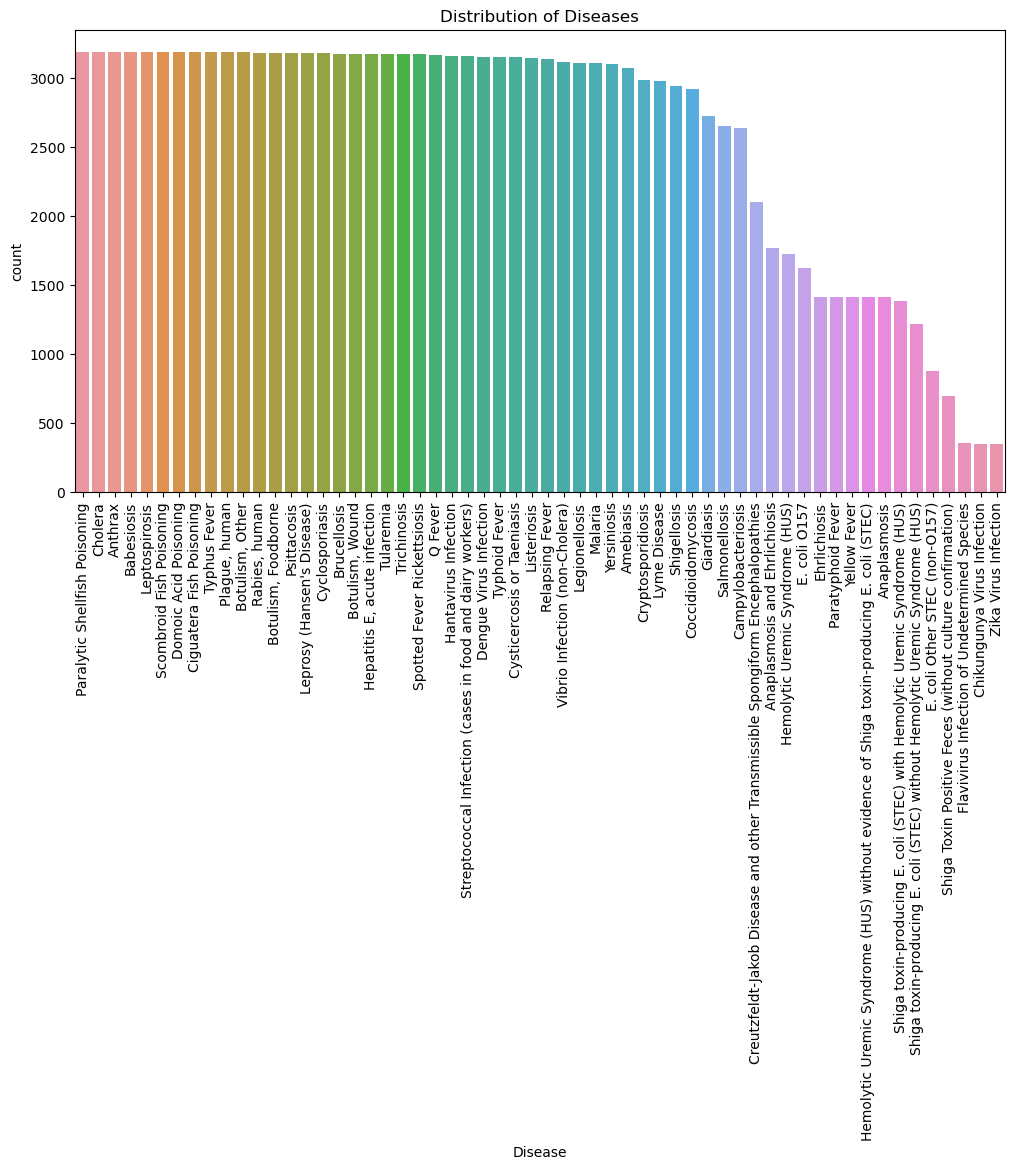

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Disease', order=df['Disease'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Diseases')
plt.show()

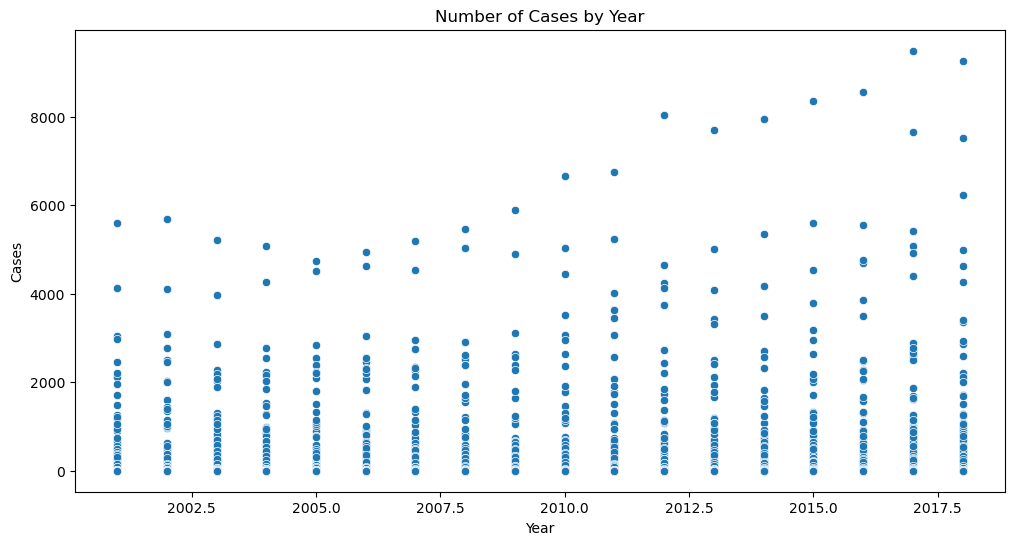

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Year', y='Cases')
plt.title('Number of Cases by Year')
plt.show()

### 3. Machine Learning

K-means Clustering

E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


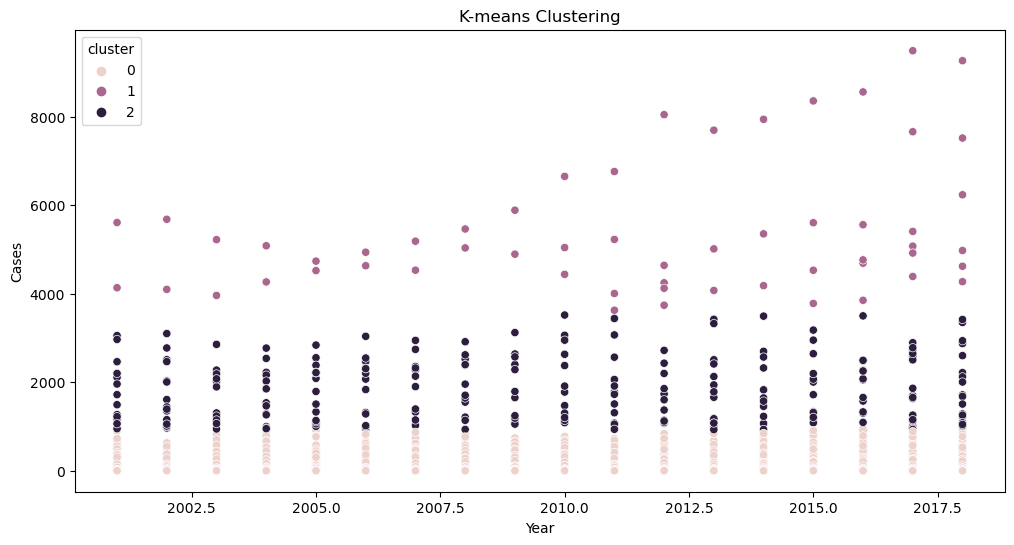

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocessing
df['Cases'] = df['Cases'].fillna(0)
StandardScaler().fit_transform(df[['Cases']])

# K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(StandardScaler().fit_transform(df[['Cases']]))
df['cluster'] = kmeans.labels_

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Cases', hue='cluster', data=df)
plt.title('K-means Clustering')
plt.show()

DBSCAN Clustering

In [31]:
from sklearn.cluster import DBSCAN

# DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(StandardScaler().fit_transform(df[['Cases']]))
df['dbscan_cluster'] = dbscan.labels_

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Cases', hue='dbscan_cluster', data=df)
plt.title('DBSCAN Clustering')
plt.show()

MemoryError: 

Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['Cases'])
y = df['Cases']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')